In [1]:
#import pandas and numpy libraries
import pandas as pd
import numpy as np
import sys #sys needed only for python version
#display versions of python and packages
print('\npython version ' + sys.version)
print('pandas version ' + pd.__version__)
print('numpy version ' + np.__version__)
#show plots in notebook
%matplotlib inline

# grab saved dataset
df = pd.read_pickle('dataset.pkl')
#show the first 5 rows
print(df.sample(n=5))

/Users/cohare/anaconda3/lib/python3.6/site-packages/numexpr/cpuinfo.py:76: UserWarning: [Errno 2] No such file or directory: 'sysctl'
  stacklevel=stacklevel + 1):



python version 3.6.0 |Anaconda 4.3.0 (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
pandas version 0.19.2
numpy version 1.11.3
                username    password  username length  password length  \
9519374            vdb01    z55d3ks2                5                8   
147448           44224bf    rock1014                7                8   
7726623        robertope    66sindac                9                8   
4255213  iura.spiridonov  2wpaF4z12H               15               10   
7557365          rebekah      120998                7                6   

        username pattern password pattern  
9519374            aaa00         a00a0aa0  
147448           00000aa         aaaa0000  
7726623        aaaaaaaaa         00aaaaaa  
4255213  aaaa&aaaaaaaaaa       0aaaA0a00A  
7557365          aaaaaaa           000000  


In [ ]:
# Retreived from http://stackoverflow.com/questions/195010/how-can-i-split-multiple-joined-words/195024#195024
# User Darius Bacon. Viterbi algorithm. Edited by Casey O'Hare to conform with data.
import re
from collections import Counter

def viterbi_segment(text):
    text = replaceNumbers(text)
    text = text.lower()
    probs, lasts = [1.0], [0]
    for i in range(1, len(text) + 1):
        prob_k, k = max((probs[j] * word_prob(text[j:i]), j)
                        for j in range(max(0, i - max_word_length), i))
        probs.append(prob_k)
        lasts.append(k)
    words = []
    i = len(text)
    while 0 < i:
        words.append(text[lasts[i]:i])
        i = lasts[i]
    words.reverse()
    return words, probs[-1]

def word_prob(word): return dictionary[word] / total
def words(text): return re.findall('[a-z]+', text.lower()) 
def replaceNumbers(text):
    text = str(text)
    text = text.replace('0','o')
    text = text.replace('1','l')
    text = text.replace('2','')
    text = text.replace('3','e')
    text = text.replace('4','a')
    text = text.replace('5','s')
    text = text.replace('6','g')
    text = text.replace('7','t')
    text = text.replace('8','')
    text = text.replace('9','')
    return text
dictionary = Counter(words(open('words3.txt').read()))
max_word_length = max(map(len, dictionary))
total = float(sum(dictionary.values()))

In [ ]:
# Temporarily using random set, because dataset takes too long to run
import time
startTime = time.time()
print(str(0) + " : " + str(startTime) + " : change : " + str(0))
dfWords = pd.DataFrame(columns=['wordsUser', 'wordsPass'])
import random
rands = random.sample(range(1, len(df['password'])), 500000)
index = 0
count = 0
for i in rands:
    wordsSep = viterbi_segment(str(df['password'][i]))
    for word in wordsSep[0]:
        if len(word) >= 3:
            dfWords.loc[index] = ['', word]
            index += 1
    count+=1
    if (count == 100 or count == 1000 or count == 10000 or count == 50000 or count == 100000 or count == 20000 or count == 300000 or count == 400000):
        currTime = time.time()
        print(str(count) + " : " + str(currTime) + " : change : " + str(currTime-startTime))
currTime = time.time()
print(str(count) + " : " + str(currTime) + " : change : " + str(currTime-startTime))
wordsPass_counts = dfWords['wordsPass'].value_counts()
print(wordsPass_counts.nlargest(20))

In [ ]:
# Save dataframe to pickle for memory and reusing reasons
dfWords.to_pickle('dfWords.pkl')

In [2]:
try:
  if dfWords is not None:
    print('Dataframe is already loaded')
except NameError:
    print('loading dataframe')
    dfWords = pd.read_pickle('dfWords.pkl')

loading dataframe


leas    6846
lol     3749
loo     3148
lea     1911
llo     1906
all     1774
oao     1748
leo     1635
man     1632
love    1597
log     1596
lao     1507
loe     1481
ltl     1470
otl     1465
loll    1431
oeo     1419
big     1392
oot     1354
ell     1353
Name: wordsPass, dtype: int64


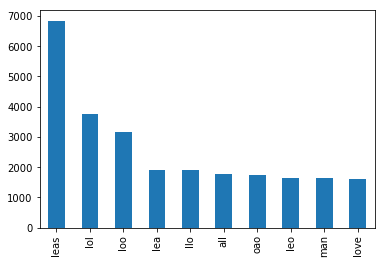

In [3]:
wordsPass_counts = dfWords['wordsPass'].value_counts()
print(wordsPass_counts.nlargest(20))
wordsPass_counts.nlargest(10).plot(kind='bar')

In [4]:
# Star Wars related verbiage
starWars = ['star', 'wars', 'vader', 'luke', 'saber', 'obi', 'wan', 'han', 'solo', 'leia', 'organa']

totalCount = 0
totalPercentage = 0
for word in starWars:
    count = 0
    percent = 0
    try:
        count = wordsPass_counts[word]
        percent = wordsPass_counts[word]/wordsPass_counts.size*100
        totalPercentage += (wordsPass_counts[word]/wordsPass_counts.size*100)
        totalCount += count
    except:
        None
    print(word, str(count), str(percent))
    # Below used for LaTeX table making
#     print(word, '&', str(count), '&', str(percent), '\\\\')
#     print('\\hline')

print('\nAll Star Wars Verbiage',str(totalCount), str(totalPercentage))

star 714 1.43598407144
wars 161 0.323800329834
vader 31 0.0623466473593
luke 47 0.0945255621254
saber 14 0.0281565504203
obi 36 0.0724025582237
wan 79 0.158883391658
han 185 0.372068701983
solo 276 0.555086279715
leia 6 0.0120670930373
organa 1 0.00201118217288

All Star Wars Verbiage 1550 3.11733236797


In [5]:
# Conjunction verbiage
conjunctions = ['and', 'or', 'but', 'nor', 'so', 'for', 'yet', 'after', 'although', 'as', 'since', 'though', \
                'unless', 'until', 'what', 'when', 'whenever', 'wherever', 'whether', 'while']

totalCount = 0
totalPercentage = 0
for word in conjunctions:
    count = 0
    percent = 0
    try:
        count = wordsPass_counts[word]
        percent = wordsPass_counts[word]/wordsPass_counts.size*100
        totalPercentage += (wordsPass_counts[word]/wordsPass_counts.size*100)
        totalCount += count
    except:
        None
    print(word, str(count), str(percent))
    # Below used for LaTeX table making
#     print(word, '&', str(count), '&', str(percent), '\\\\')
#     print('\\hline')

print('\nTotal Percentage', totalCount, totalPercentage)

and 434 0.87285306303
or 0 0
but 84 0.168939302522
nor 109 0.219218856844
so 0 0
for 271 0.545030368851
yet 16 0.0321789147661
after 14 0.0281565504203
although 0 0
as 0 0
since 2 0.00402236434576
though 0 0
unless 0 0
until 1 0.00201118217288
what 63 0.126704476892
when 4 0.00804472869152
whenever 0 0
wherever 0 0
whether 1 0.00201118217288
while 1 0.00201118217288

Total Percentage 1000 2.01118217288
